In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
stat = pd.read_excel("warriorstat.xlsx")

In [19]:
stat.head()

,MATCH UP,W/L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RATIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Feb 01, 2022 - GSW @ SAS",W,48.0,122.8,120.0,2.8,69.8,1.88,19.7,41.5,85.0,60.2,15.8,55.2,59.7,100.5,49.2
2,"Jan 31, 2022 - GSW @ HOU",W,48.0,124.5,111.3,13.1,53.5,1.53,17.7,23.7,67.9,49.5,15.3,64.4,67.7,97.5,59.9
3,"Jan 29, 2022 - GSW vs. BKN",W,48.0,111.1,109.3,1.8,60.0,2.00,16.4,38.3,65.6,52.1,12.1,48.0,51.9,98.0,51.3
4,"Jan 27, 2022 - GSW vs. MIN",W,48.0,119.2,111.7,7.6,70.5,1.63,21.4,23.8,74.5,52.6,18.3,66.5,68.0,103.5,54.2


In [20]:
stat.dropna(inplace=True)

In [21]:
stat.head()

,MATCH UP,W/L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
1,"Feb 01, 2022 - GSW @ SAS",W,48.0,122.8,120.0,2.8,69.8,1.88,19.7,41.5,85.0,60.2,15.8,55.2,59.7,100.5,49.2
2,"Jan 31, 2022 - GSW @ HOU",W,48.0,124.5,111.3,13.1,53.5,1.53,17.7,23.7,67.9,49.5,15.3,64.4,67.7,97.5,59.9
3,"Jan 29, 2022 - GSW vs. BKN",W,48.0,111.1,109.3,1.8,60.0,2.00,16.4,38.3,65.6,52.1,12.1,48.0,51.9,98.0,51.3
4,"Jan 27, 2022 - GSW vs. MIN",W,48.0,119.2,111.7,7.6,70.5,1.63,21.4,23.8,74.5,52.6,18.3,66.5,68.0,103.5,54.2
5,"Jan 25, 2022 - GSW vs. DAL",W,48.0,131.3,92.9,38.4,63.3,2.21,21.5,31.8,78.0,58.3,14.1,62.5,65.1,99.0,68.4


In [22]:
y = stat['W/L']

In [23]:
stat.columns

Index(['MATCH UP', 'W/L', 'MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%',
       'AST/TO', 'AST', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%', 'TS%',
       'PACE', 'PIE'],
      dtype='object')

In [24]:
X = stat[['OFFRTG', 'DEFRTG', 'NETRTG', 'AST%',
       'AST/TO', 'AST', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%', 'TS%',
       'PACE', 'PIE']]

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(n_estimators = 30, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy score',accuracy_score(y_test, y_pred))
cv_results = cross_validate(clf, X, y, cv=5)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('cross validatoin results', cv_results)

Accuracy score 1.0
[[ 3  0]
 [ 0 15]]
              precision    recall  f1-score   support

           L       1.00      1.00      1.00         3
           W       1.00      1.00      1.00        15

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

cross validatoin results {'fit_time': array([0.03893614, 0.03395033, 0.0339067 , 0.03390861, 0.03785896]), 'score_time': array([0.0039928 , 0.00398803, 0.00498939, 0.00398469, 0.004987  ]), 'test_score': array([1., 1., 1., 1., 1.])}


[ 2 13 11 10  0  1  5  4  3  7  8  6 12  9]


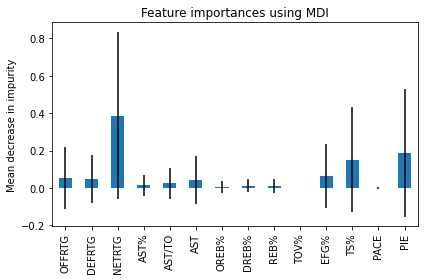

In [27]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print(sorted_indices)
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names=X.columns
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<AxesSubplot:>

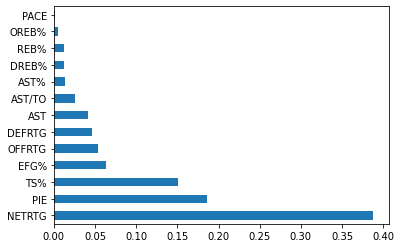

In [28]:
pd.Series(clf.feature_importances_, index=X.columns).nlargest(13).plot(kind='barh')

The random forest model showed powerful prediction of 100% for the basketball match results! Rebound difference is the most important. More offense rebound will lead the win!